# **Introduction**

Music Experts have been trying for a long time to understand sound and what differenciates one song from another. How to visualize sound. What makes a tone different from another. This data hopefully can give the opportunity to do just that.
In this Project we learn basic information about audio data, which are needed for using audio in Machine Learning and Deep Learning models.




# **Import Libraries**


In [ ]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
general_path = '/content/drive/MyDrive/Data'
print(list(os.listdir(f'{general_path}/genres_original/')))

['pop', 'metal', 'jazz', 'country', 'rock', 'reggae', 'disco', 'hiphop', 'classical', 'blues']


# **Explore Audio Data**
We will use librosa, which is the mother of audio files.

**Understanding Audio**

Let's first Explore our Audio Data to see how it looks.

* Sound: sequence of vibrations in varying pressure strengths (y)

* The sample rate (sr) is the number of samples of audio carried per second, measured in Hz or kHz







In [ ]:
# Importing 1 file
y, sr = librosa.load(f'{general_path}/genres_original/rock/rock.00036.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', 661794/22050)

y: [0.3204956  0.22769165 0.26626587 ... 0.21588135 0.20315552 0.35205078] 

y shape: (667920,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


In [ ]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [0.3204956  0.22769165 0.26626587 ... 0.21588135 0.20315552 0.35205078] 

Audio File shape: (667920,)


# **2D Representation: Sound Waves**


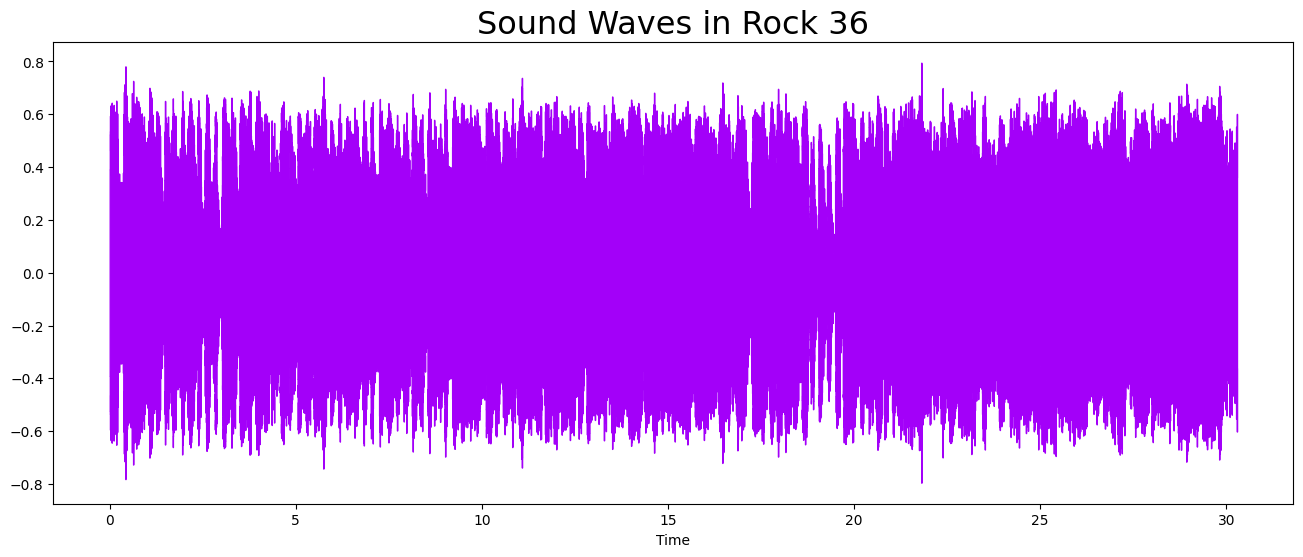

In [ ]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F9");
plt.title("Sound Waves in Rock 36", fontsize = 23);

# **Fourier Transform**

* Function that gets a signal in the time domain as input, and outputs its decomposition into frequencies


* Transform both the y-axis (frequency) to log scale, and the x-axis (amplitude) to Decibels, which is approx. the log scale of amplitudes.



In [ ]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 1305)


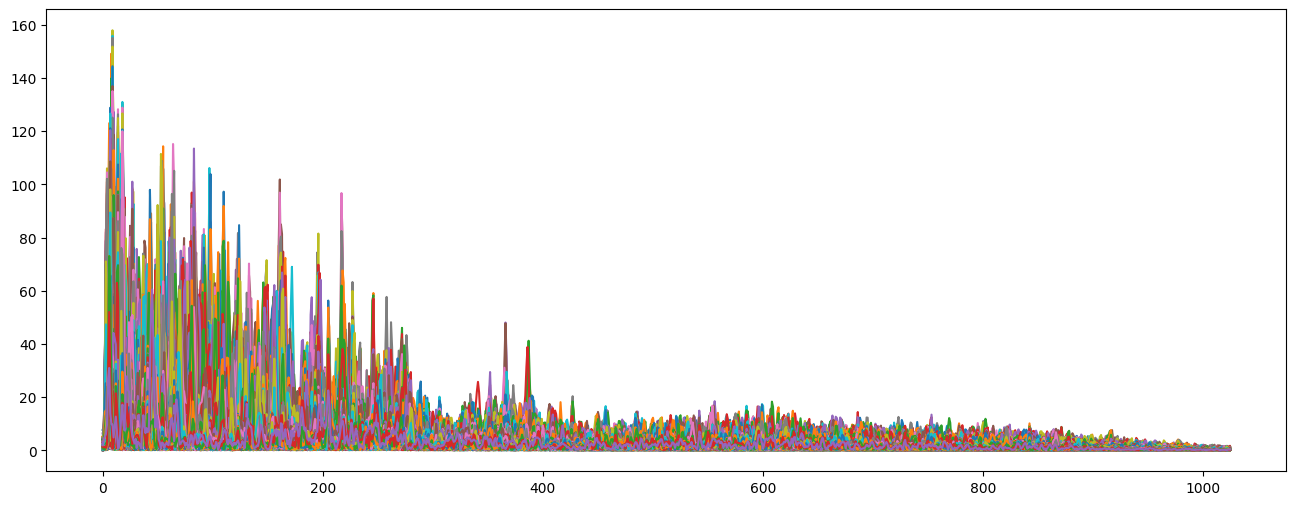

In [ ]:
plt.figure(figsize = (16, 6))
plt.plot(D);

# **The Spectrogram**
What is a spectrogram? A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams (wiki).
Here we convert the frequency axis to a logarithmic one.

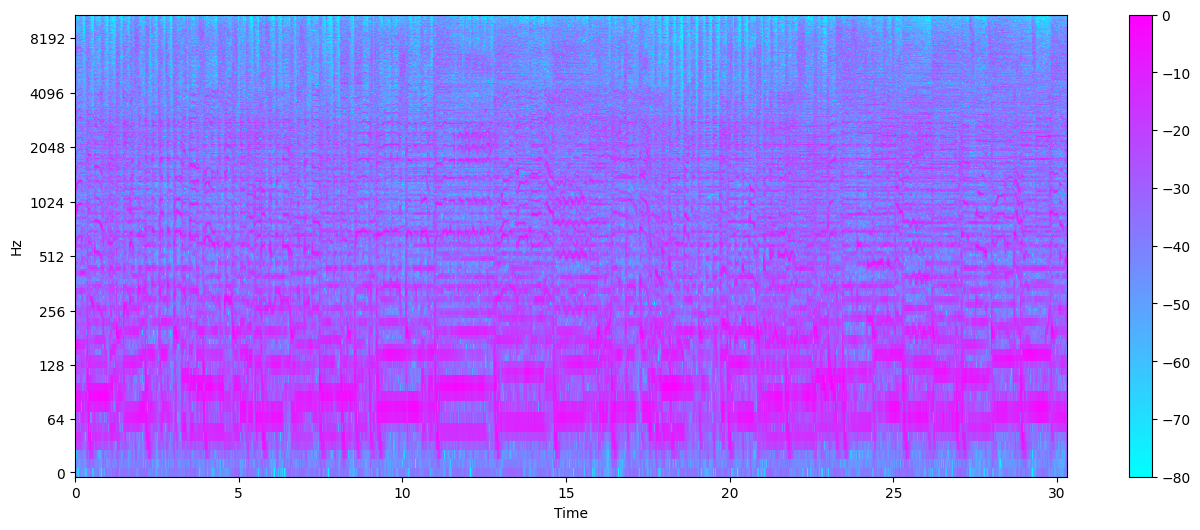

In [ ]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar();

# **Mel Spectrogram (Melodic Spectogram)**
A Mel spectrogram is a type of spectrogram that represents the spectral content of a sound or signal on a scale that is based on the perceived pitch of the different frequencies. The Mel scale is a logarithmic scale that maps frequency to pitch in a way that is more closely related to how the human auditory system perceives pitch.

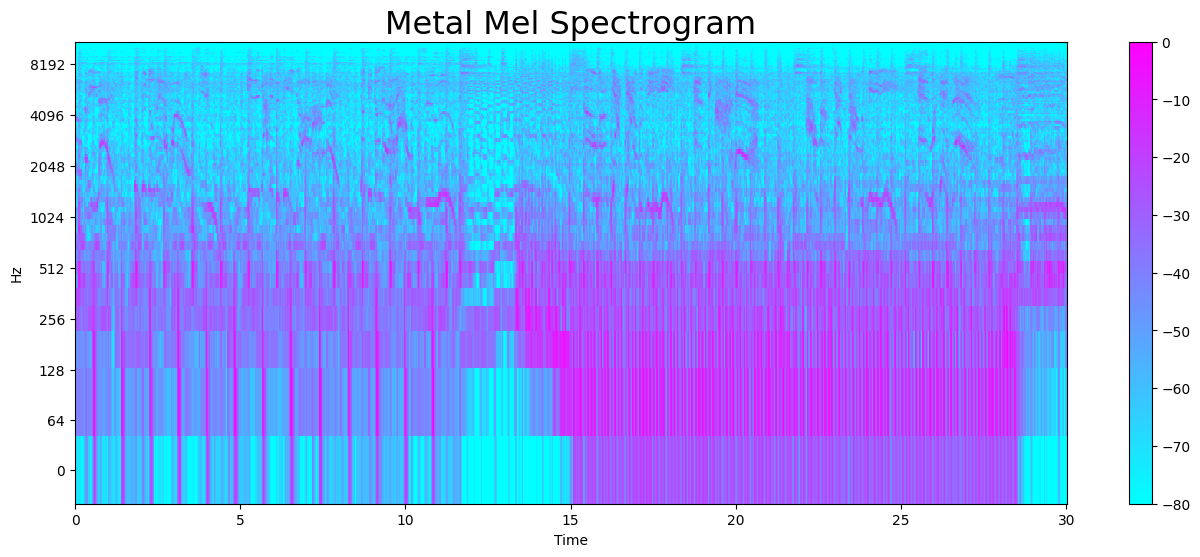

In [ ]:
y, sr = librosa.load(f'{general_path}/genres_original/metal/metal.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Metal Mel Spectrogram", fontsize = 23);

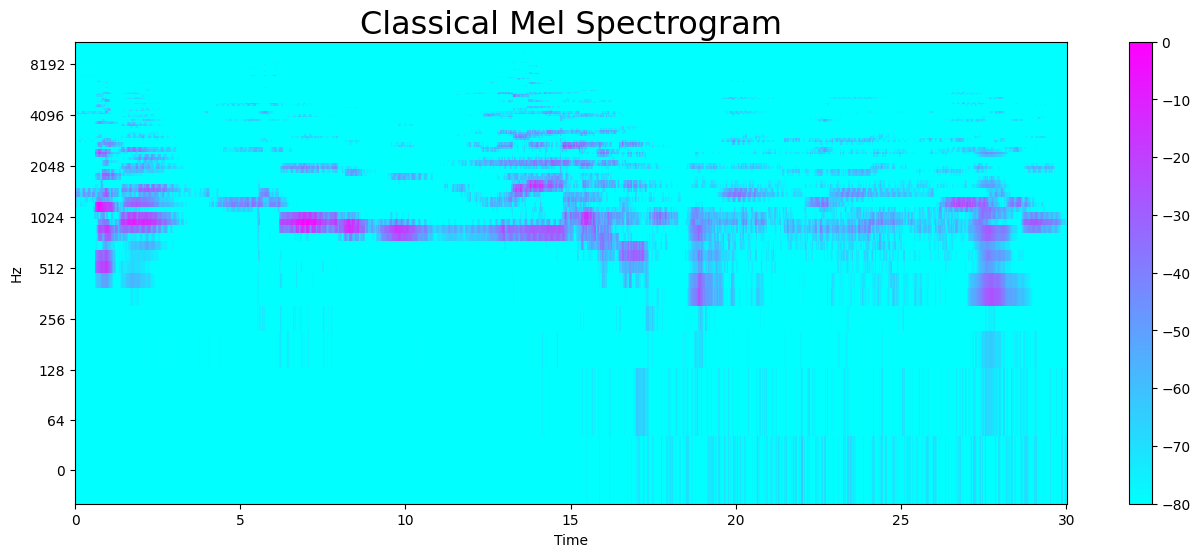

In [ ]:
y, sr = librosa.load(f'{general_path}/genres_original/classical/classical.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Classical Mel Spectrogram", fontsize = 23);

# **Audio Features**
**Zero Crossing Rate**

* the rate at which the signal changes from positive to negative or back.





In [ ]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

98364


# **Harmonics and Perceptrual**
* Harmonics are characteristichs that human years can't distinguish (represents the sound color)
* Perceptrual understanding shock wave represents the sound rhythm and emotion




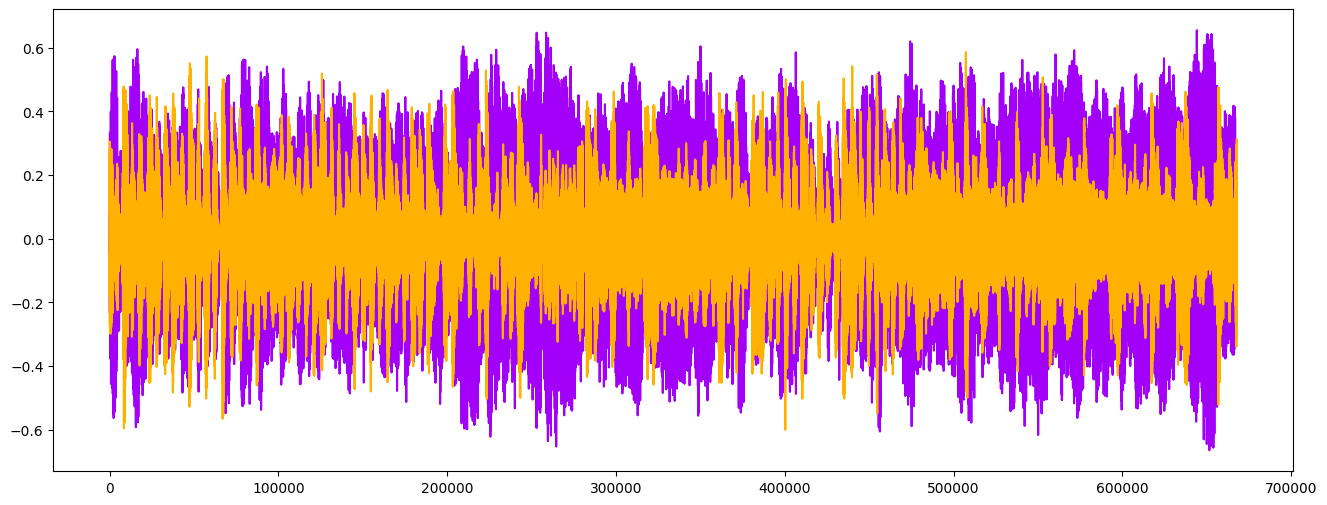

In [ ]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');

# **Tempo BMP (beats per minute)**
Dynamic programming beat tracker.

In [ ]:
tempo, _ = librosa.beat.beat_track(y=y, sr = sr)
tempo

107.666015625

# **Spectral Centroid**
* indicates where the centre of mass for a sound is located and is
calculated as the weighted mean of the frequencies present in the sound.



In [ ]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(y=audio_file, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids: [2661.51676163 2790.14559734 2684.77155126 ... 3641.76382121 3346.51559223
 3169.36112321] 

Shape of Spectral Centroids: (1305,) 

frames: range(0, 1305) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 3.02323810e+01
 3.02556009e+01 3.02788209e+01]


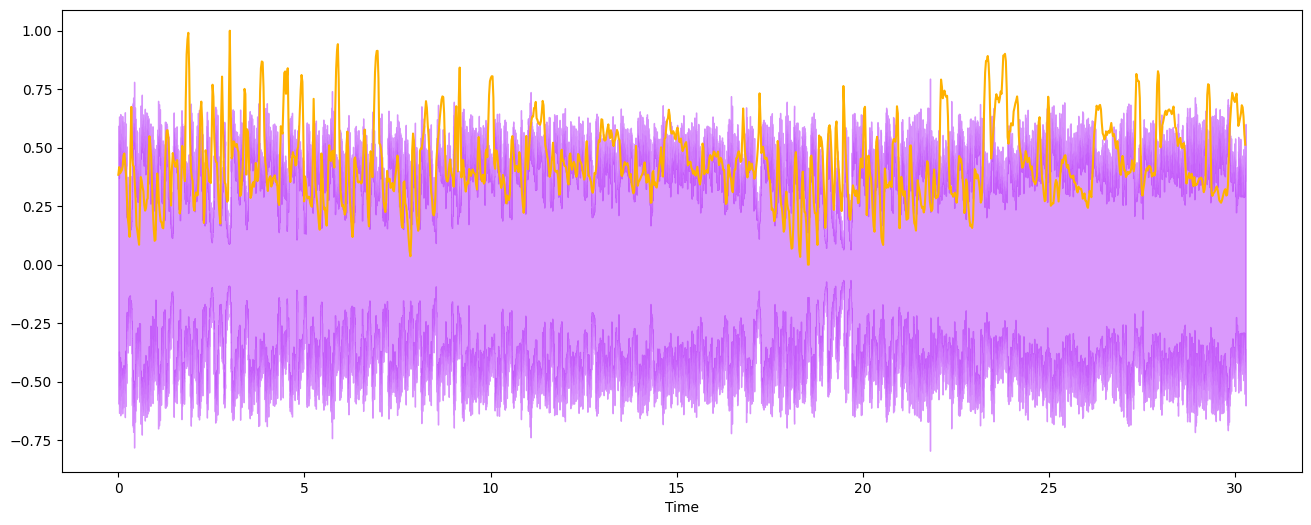

In [ ]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_centroids), color='#FFB100');

# **Spectral Rolloff**
* is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies




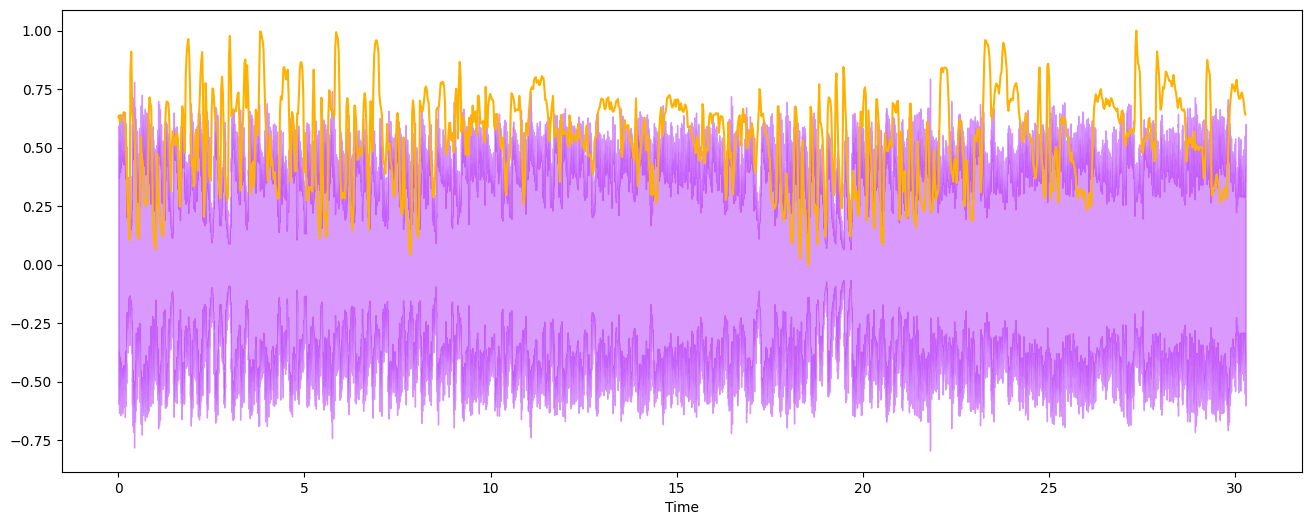

In [ ]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(y=audio_file, sr=sr)[0]

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_rolloff), color='#FFB100');

# **Mel-Frequency Cepstral Coefficients:**
The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

mfccs shape: (20, 1305)


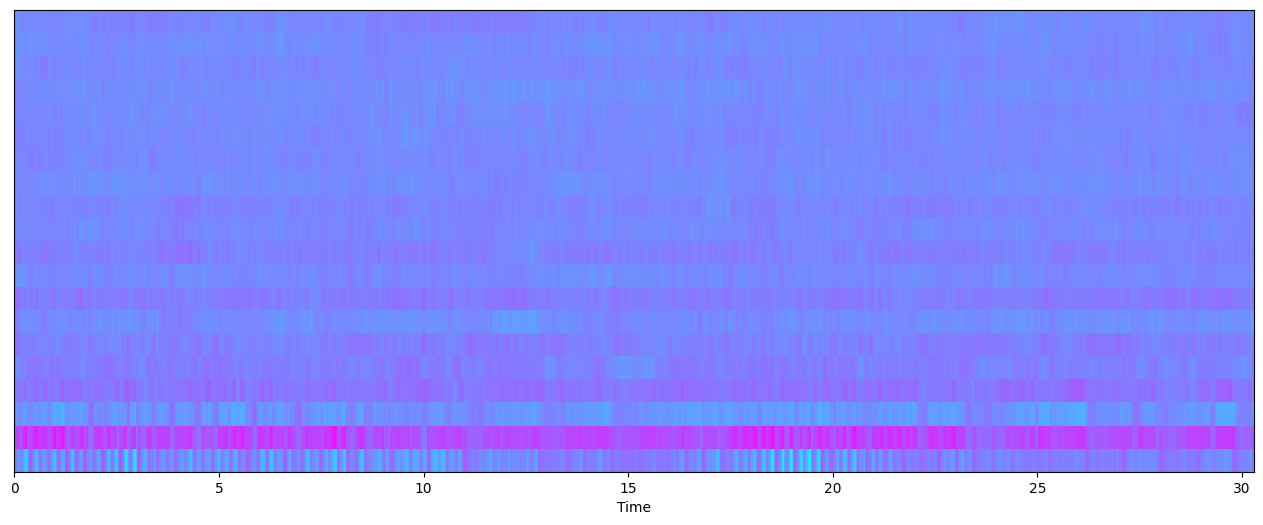

In [ ]:
mfccs = librosa.feature.mfcc(y=audio_file, sr=sr)
print('mfccs shape:', mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

Data needs to be scaled:



Mean: -3.8000816e-09 

Var: 1.0000001


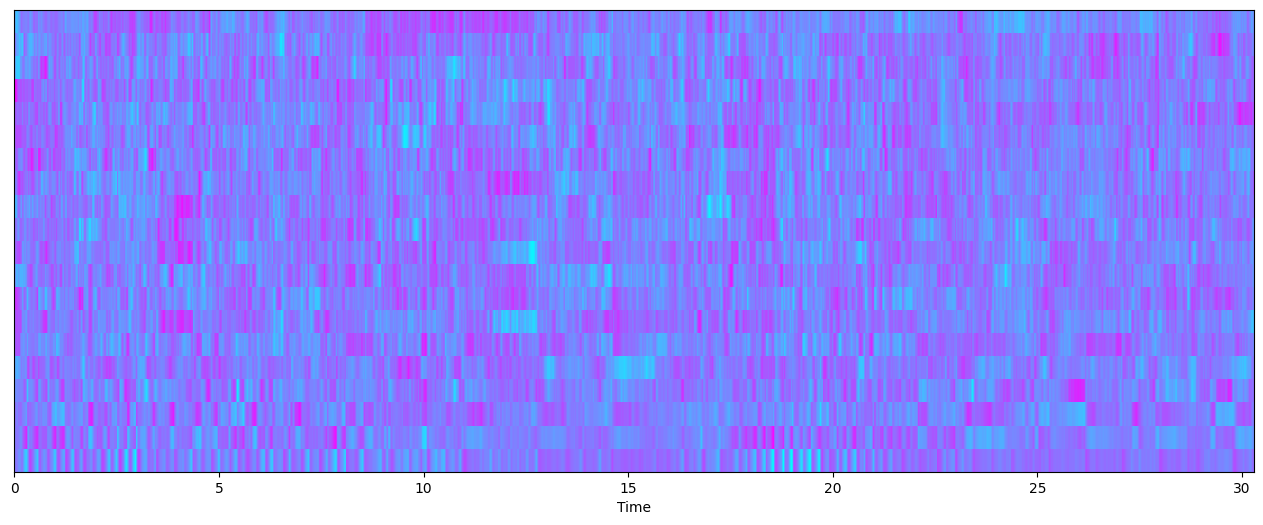

In [ ]:
# Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

# **Chroma Frequencies**
* Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.

Chromogram shape: (12, 134)


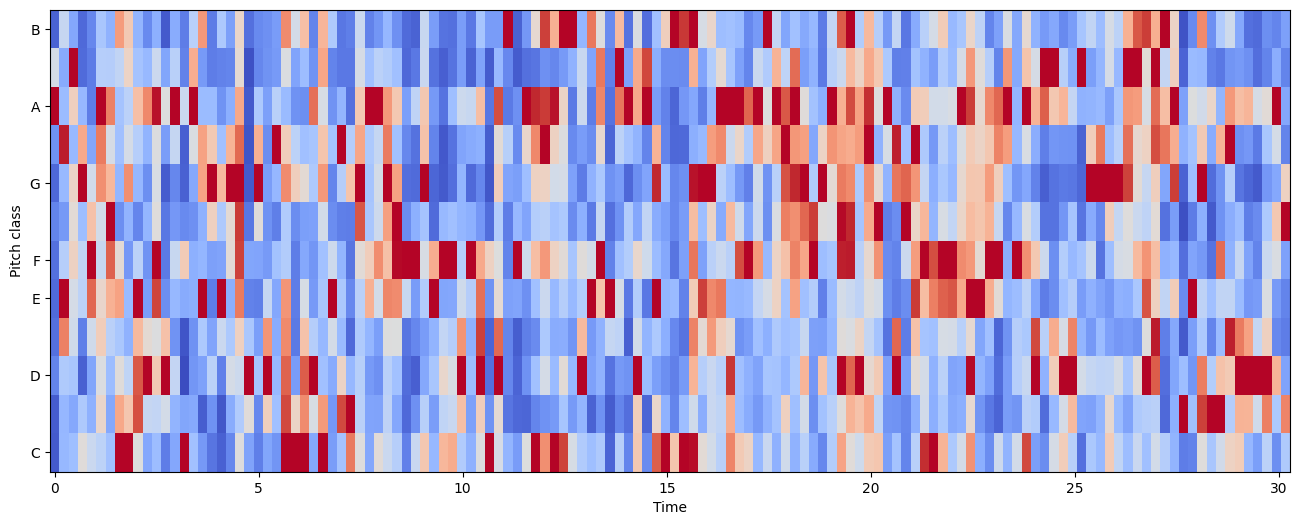

In [ ]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromogram
chromagram = librosa.feature.chroma_stft(y=audio_file, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');

# **EDA**
EDA is going to be performed on the features_30_sec.csv. This file contains the mean and variance for each audio file fo the features analysed above.

So, the table has a final of 1000 rows (10 genrex x 100 audio files) and 60 features (dimensionalities).

In [ ]:
data = pd.read_csv(f'{general_path}/features_30_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
data.shape

(1000, 60)

In [ ]:
data.isnull().sum() # checking for missing values


filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [ ]:
data["label"].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
length,1000.0,6.620308e+05,1.784074e+03,6.600000e+05,661504.000000,6.617940e+05,6.617940e+05,6.758080e+05
chroma_stft_mean,1000.0,3.786817e-01,8.170489e-02,1.719392e-01,0.319562,3.831479e-01,4.359417e-01,6.636847e-01
chroma_stft_var,1000.0,8.633982e-02,7.735298e-03,4.455525e-02,0.082298,8.661463e-02,9.125551e-02,1.081115e-01
rms_mean,1000.0,1.309297e-01,6.568311e-02,5.276444e-03,0.086657,1.224431e-01,1.756822e-01,3.979734e-01
rms_var,1000.0,3.051399e-03,3.634500e-03,4.294372e-06,0.000942,1.816440e-03,3.577055e-03,2.767948e-02
spectral_centroid_mean,1000.0,2.201781e+03,7.159606e+02,5.700404e+02,1627.697311,2.209263e+03,2.691295e+03,4.435244e+03
spectral_centroid_var,1000.0,4.696916e+05,4.008995e+05,7.911251e+03,184350.530174,3.384862e+05,6.121479e+05,3.036843e+06
spectral_bandwidth_mean,1000.0,2.242541e+03,5.263165e+02,8.980662e+02,1907.240605,2.221393e+03,2.578470e+03,3.509646e+03
spectral_bandwidth_var,1000.0,1.370792e+05,9.645567e+04,1.078719e+04,67376.554428,1.119775e+05,1.823716e+05,6.947848e+05
rolloff_mean,1000.0,4.571549e+03,1.574792e+03,7.491406e+02,3380.069642,4.658524e+03,5.533810e+03,8.677673e+03


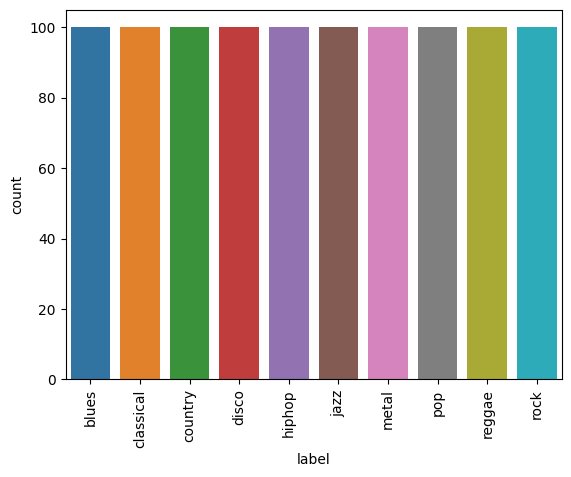

In [ ]:
sns.countplot(x=data.label) # plot the categories
plt.xticks(rotation=90);

# **Correlation Heatmap for feature means**


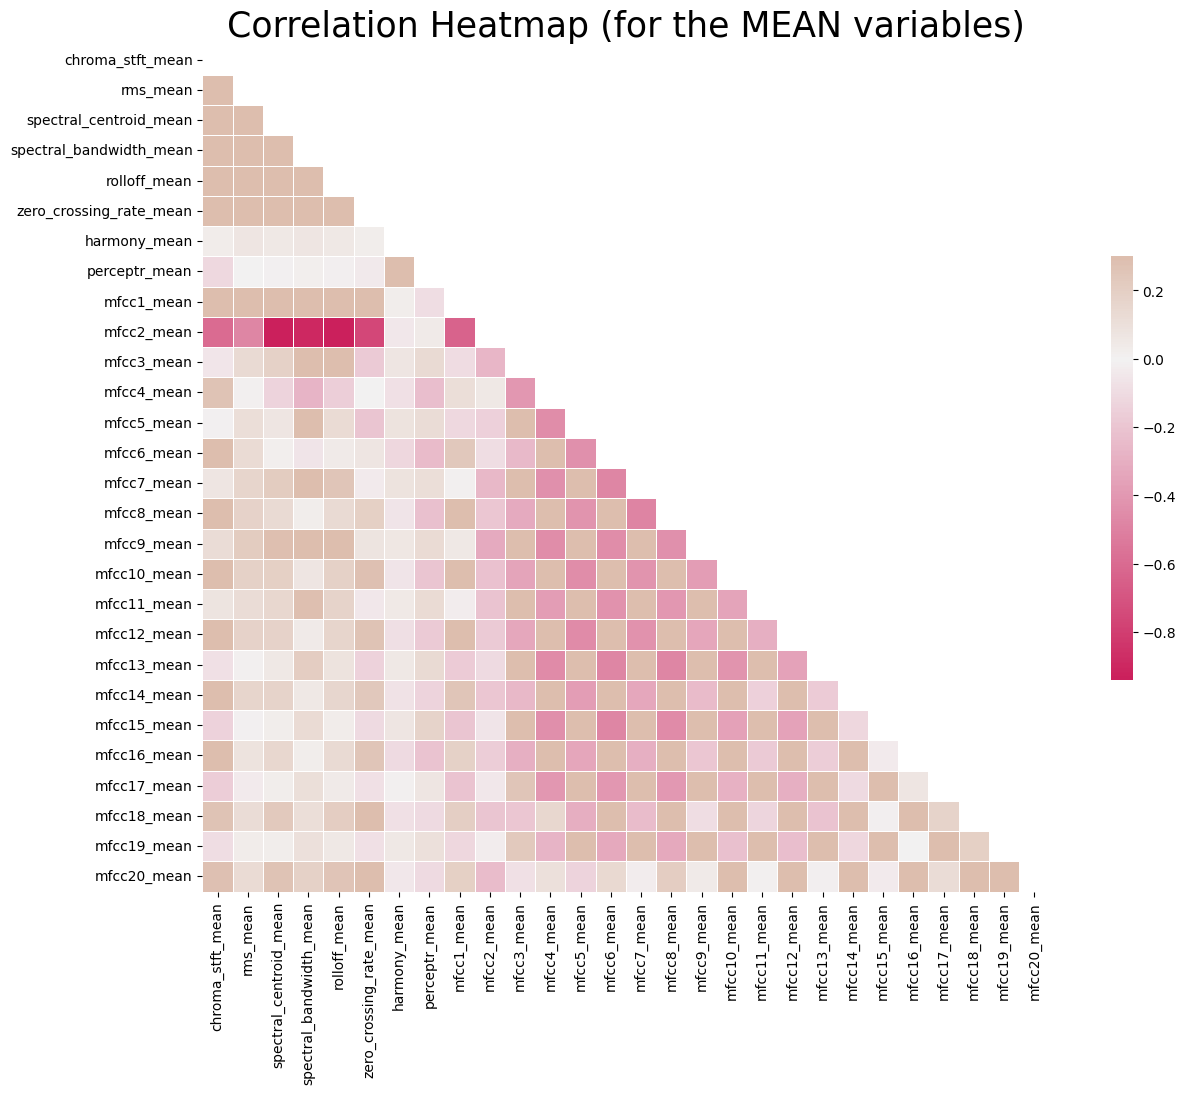

In [ ]:
# Computing the Correlation Matrix
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr Heatmap.jpg")

# **Box Plot for Genres Distributions**


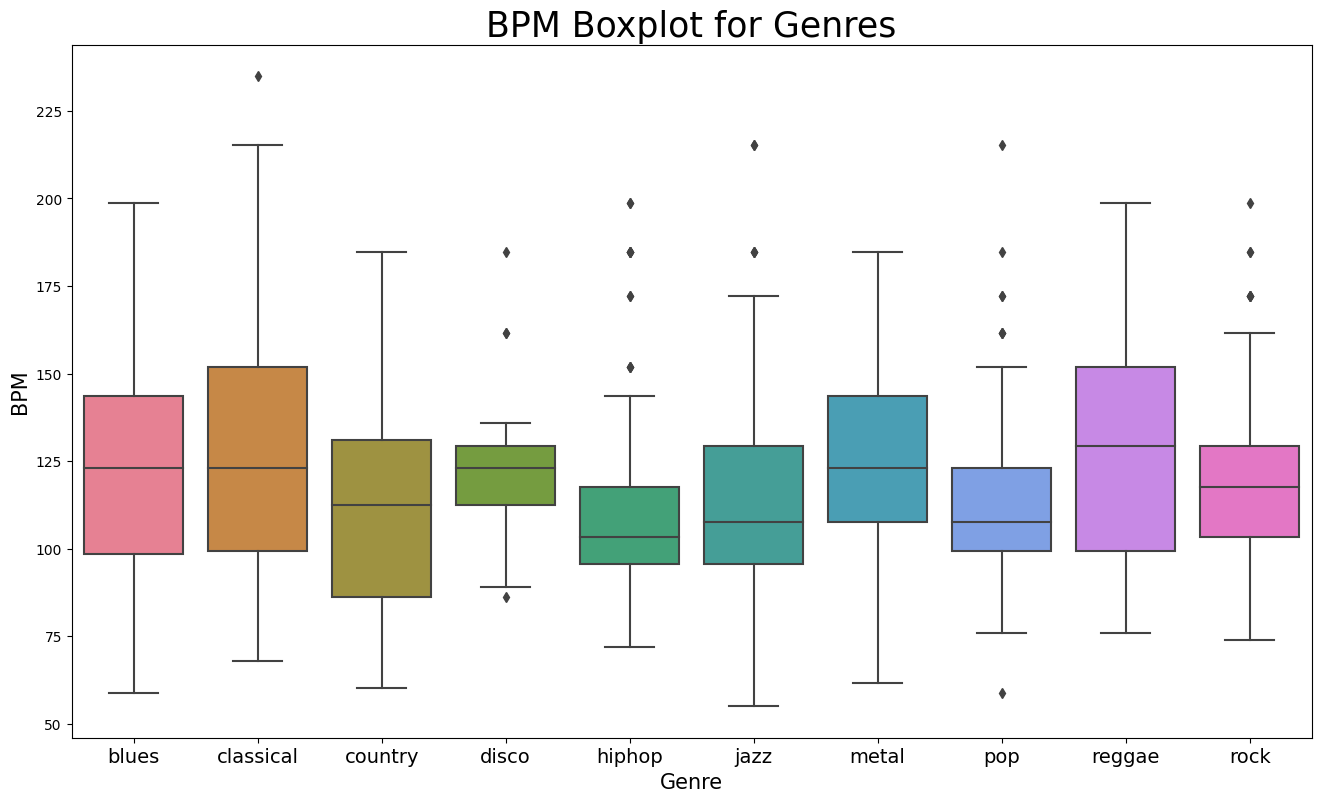

In [ ]:
x = data[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM Boxplot.jpg")

# **Principal Component Analysis - to visualize possible groups of genres**

1. Normalization
2. PCA
3. The Scatter Plot





In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])


X = data.drop(['label','filename'],axis=1)
y = data['label']





#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

# 44.93 variance explained

array([0.2439355 , 0.21781804])

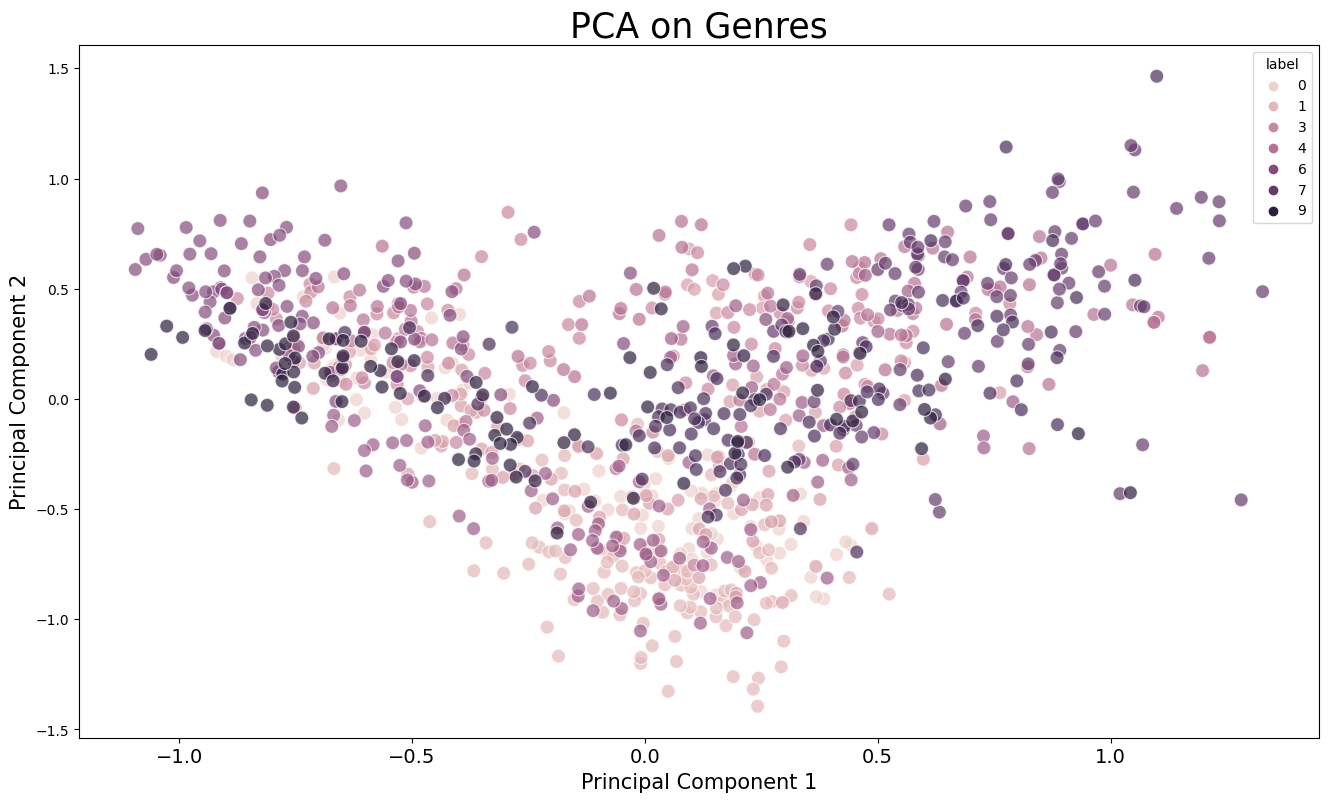

In [ ]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

# **Machine Learning Classification**
Using the features_3_sec.csv file, we can try to build a classifier that accurately predicts for any new audio file input it's genre.

**Libraries**

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRFClassifier


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import RFE



# **Reading in the Data**
Now let's try to predict the Genre of the audio using Machine Learning techniques.

In [ ]:
data = pd.read_csv(f'{general_path}/features_3_sec.csv')
data = data.iloc[0:, 1:]
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


# **Features and Target variable**
creates the target and feature variables
normalizes the data

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

In [ ]:
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels

#### NORMALIZE X ####

# Normalize so everything is on the same scale.

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data.
X = pd.DataFrame(np_scaled, columns = cols)

# **Splitting the data into training and testing**
70% - 30% split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6993, 58), (2997, 58), (6993,), (2997,))

# **Creating a Predefined function to assess the accuracy of a model**

* input is the model
* fits the model on the training dataset
* predicts on the testing features
* compares the predictions with the actuals







In [ ]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

# **Trying 3 different models to assess their performance**
We tried 3 classification models, the best performing model was Random Forest.



In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1500, max_depth=15, random_state=111)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")



Accuracy KNN : 0.80414 

Accuracy Random Forest : 0.8712 

Accuracy Support Vector Machine : 0.74775 



# **Hyperparameter Optimization**


In [ ]:
# Hyperparameter tuning for Random Forest
params = {
    'n_estimators': [100, 500, 1000, 1500],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15]
}

rforest = RandomForestClassifier(random_state=111)

# Use RandomizedSearchCV to find the best hyperparameters
model = RandomizedSearchCV(rforest, param_distributions=params, n_iter=10, cv=5, verbose=2)
model.fit(X_train, y_train)

# Print the best hyperparameters
print(model.best_params_)

# Make predictions with the best model
preds = model.predict(X_test)

# Evaluate the model
print('Accuracy:', round(accuracy_score(y_test, preds), 5))
print(classification_report(y_test, preds))

# Hyperparameter tuning for SVM
params = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [1, 10, 100, 1000],
    'gamma': ['scale', 'auto']
}

svm = SVC(random_state=111)

# Use RandomizedSearchCV to find the best hyperparameters
model = RandomizedSearchCV(svm, param_distributions=params, n_iter=10, cv=5, verbose=2)
model.fit(X_train, y_train)

# Print the best hyperparameters
print(model.best_params_)

# Make predictions with the best model
preds = model.predict(X_test)

# Evaluate the model
print('Accuracy:', round(accuracy_score(y_test, preds), 5))
print(classification_report(y_test, preds))

# Hyperparameter tuning for KNN
params = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

# Use RandomizedSearchCV to find the best hyperparameters
model = RandomizedSearchCV(knn, param_distributions=params, n_iter=10, cv=5, verbose=2)
model.fit(X_train, y_train)

# Print the best hyperparameters
print(model.best_params_)

# Make predictions with the best model
preds = model.predict(X_test)

# Evaluate the model
print('Accuracy:', round(accuracy_score(y_test, preds), 5))
print(classification_report(y_test, preds))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, min_samples_split=10, n_estimators=100; total time=   2.8s
[CV] END max_depth=5, min_samples_split=10, n_estimators=100; total time=   2.1s
[CV] END max_depth=5, min_samples_split=10, n_estimators=100; total time=   2.4s
[CV] END max_depth=5, min_samples_split=10, n_estimators=100; total time=   2.1s
[CV] END max_depth=5, min_samples_split=10, n_estimators=100; total time=   4.2s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=   5.1s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=   3.9s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=   4.1s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=   6.0s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=   4.8s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   3.8s
[CV] END .max_depth=5, min_samples_split=2, n_es

KNN has the highest accuracy with 94%

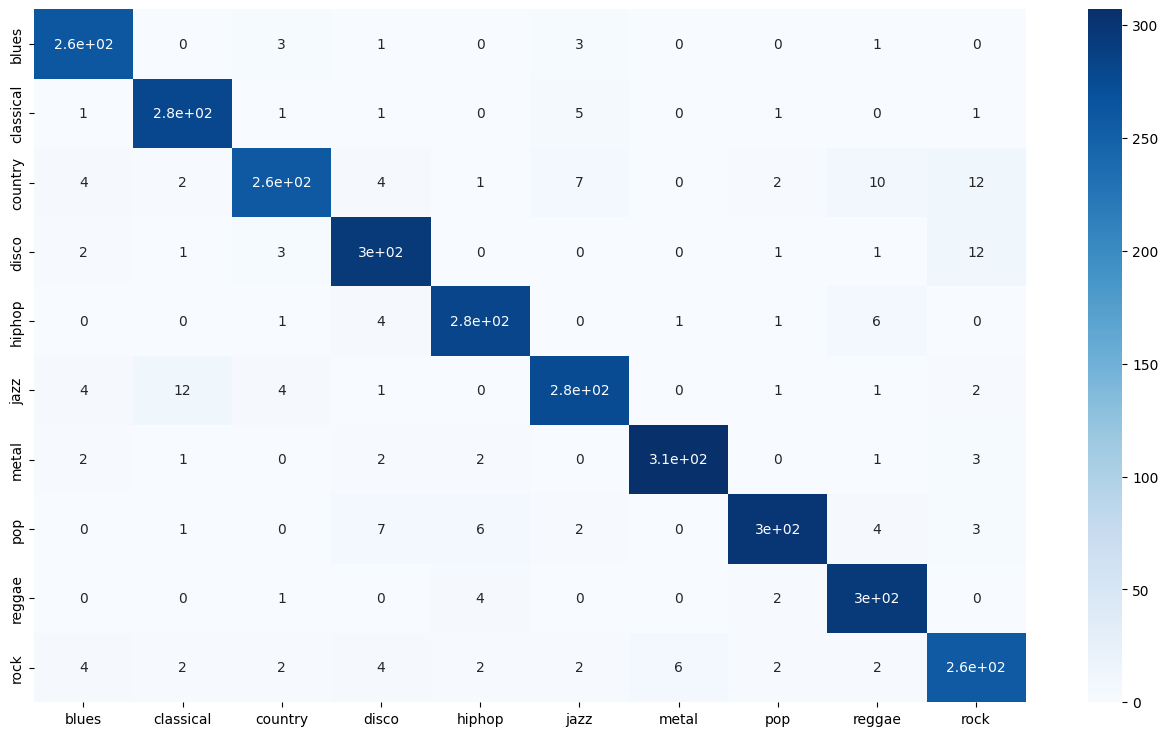

In [ ]:

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True,
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.savefig("conf matrix")


## **Deep Learning Model**
Now it's time to build our deep learning model,so let's go ahead

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

In [ ]:



model = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax"),

])
print(model.summary()) # show summary of model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [ ]:
adam = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=adam,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [ ]:
hist = model.fit(X_train, y_train,
                 validation_data = (X_test,y_test),
                 epochs = 300,
                 batch_size = 128)

Epoch 1/300
55/55 [==============================] - 5s 27ms/step - loss: 2.2894 - accuracy: 0.1524 - val_loss: 2.2479 - val_accuracy: 0.3493
Epoch 2/300
55/55 [==============================] - 1s 12ms/step - loss: 2.2271 - accuracy: 0.2211 - val_loss: 2.1312 - val_accuracy: 0.3457
Epoch 3/300
55/55 [==============================] - 1s 12ms/step - loss: 2.0972 - accuracy: 0.2741 - val_loss: 1.9465 - val_accuracy: 0.3684
Epoch 4/300
55/55 [==============================] - 1s 11ms/step - loss: 1.9319 - accuracy: 0.3156 - val_loss: 1.7606 - val_accuracy: 0.3790
Epoch 5/300
55/55 [==============================] - 1s 13ms/step - loss: 1.8029 - accuracy: 0.3449 - val_loss: 1.6529 - val_accuracy: 0.4117
Epoch 6/300
55/55 [==============================] - 1s 12ms/step - loss: 1.7288 - accuracy: 0.3681 - val_loss: 1.5538 - val_accuracy: 0.4521
Epoch 7/300
55/55 [==============================] - 1s 12ms/step - loss: 1.6475 - accuracy: 0.3980 - val_loss: 1.4817 - val_accuracy: 0.4494
Epoch 

In [ ]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")

94/94 [==============================] - 0s 2ms/step - loss: 0.3669 - accuracy: 0.8799
Test accuracy: 0.879879891872406


# **Plot Accuracy and Loss**


<Figure size 2000x1500 with 0 Axes>

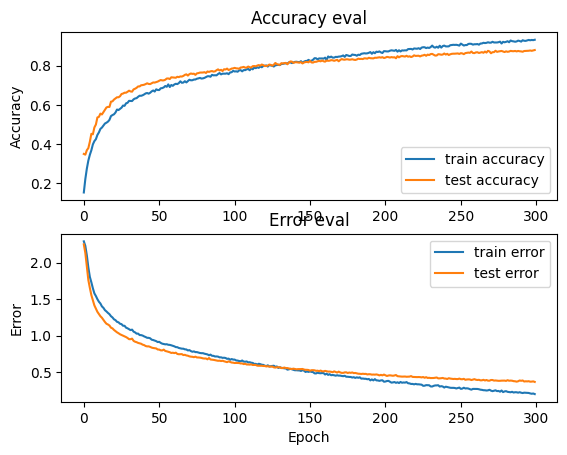

In [ ]:
plt.figure(figsize=(20,15))
fig, axs = plt.subplots(2)

# accuracy
axs[0].plot(hist.history["accuracy"], label="train accuracy")
axs[0].plot(hist.history["val_accuracy"], label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")

# Error
axs[1].plot(hist.history["loss"], label="train error")
axs[1].plot(hist.history["val_loss"], label="test error")
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")

plt.show()

In [ ]:
import pickle

# Save the model to a pickle file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# Load the model from a pickle file
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)